In [ ]:
from Class_PINN_FBPINN import *
import matplotlib.pyplot as plt
import pickle

Running on  cpu


In [2]:
torch.cuda.is_available()

False

#### Multi-Case 5

In [19]:
num_points = 200*15
n_epochs = 50000

l1_loss_pinn_arr = []
l1_loss_pinn_min = []
loss_pinns_layers = []

In [20]:
domain = [-2*np.pi, 2*np.pi]

w_list = [2, 4, 8, 16, 32]

n_multi_scale = len(w_list)
neurons = 32

In [21]:
def plot_solution_pinn(model, nr_layers):
    fig = plt.figure(figsize=(10, 5))
    model.eval()
    # test points
    x = torch.linspace(domain[0], domain[1], num_points, dtype=torch.float32, device=DEVICE, requires_grad=True).reshape(-1, 1)   # the input has to be of shape (n, 1)

    # Evaluate the exact solution
    u_exact = model.exact_solution(x)

    # Evaluate the approximate solution
    u_approx = torch.tanh(model.w_list[-1] * model.normalize_input(x)) * model.unnormalize_output( model( model.normalize_input(x)) )

    # Resale the approximate solution to the same scale as the exact solution
    u_approx = model.restore_output(u_approx)

    #Plot
    
    plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact Solution')
    plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='PINN')
    plt.title('PINN ({} layers)'.format(nr_layers))
    plt.legend()
    plt.xlabel(r'$x$')
    plt.ylabel(r'$u$')
    plt.savefig("fig_scaling/fig_pinn_{}_{}.pdf".format(len(w_list), nr_layers))
    plt.show()

Epoch :  0 	 Loss:  756.0093994140625 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  678.7470092773438 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  678.7276000976562 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  678.6988525390625 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  678.6378784179688 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  678.4221801757812 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  678.0154418945312 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  677.8320922851562 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  677.719970703125 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  677.5965576171875 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  677.410888671875 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  677.12255859375 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  676.7486572265625 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  676.29736328125 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  675.6365356445312 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  674.6134033203125 	 Epoch_time:  0  s
Epoch :  1600 	 Loss:  673.3800048828125 	

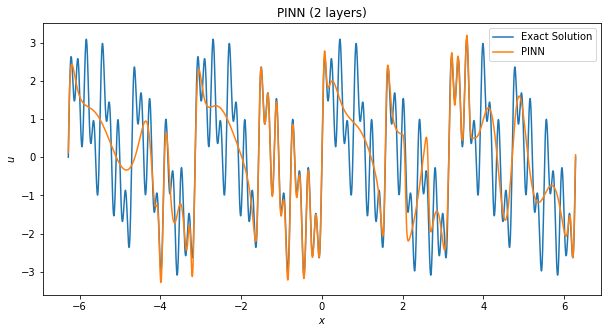

Loss: 0.6168158650398254
Epoch :  0 	 Loss:  697.208984375 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  678.6740112304688 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  678.5851440429688 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  678.3743896484375 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  677.79833984375 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  677.512939453125 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  677.2755126953125 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  676.615234375 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  673.8294677734375 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  664.44580078125 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  660.6434936523438 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  660.55859375 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  660.4990844726562 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  660.4429321289062 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  660.3850708007812 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  660.3218994140625 	 Epoch_time:  0  s
Epoch :  1600 	 Loss:  660.23

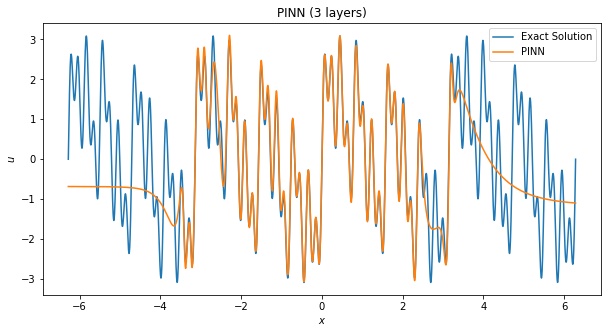

Loss: 0.5760385990142822
Epoch :  0 	 Loss:  697.1663818359375 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  677.03759765625 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  674.5752563476562 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  660.6945190429688 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  660.5105590820312 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  660.4014892578125 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  660.2815551757812 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  659.665771484375 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  650.9408569335938 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  639.4879760742188 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  633.4579467773438 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  621.0919799804688 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  604.07421875 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  599.796142578125 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  598.229248046875 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  592.1513671875 	 Epoch_time:  0  s
Epoch :  1600 	 Loss:  5

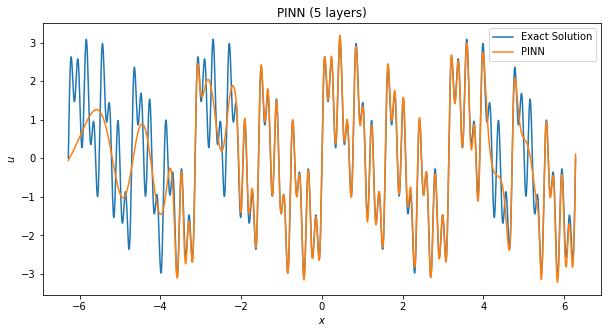

Loss: 0.3392612636089325
Epoch :  0 	 Loss:  688.093017578125 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  660.7286376953125 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  659.9683227539062 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  654.94873046875 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  639.1484985351562 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  631.84423828125 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  619.93017578125 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  619.4105224609375 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  619.079345703125 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  618.501220703125 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  618.1841430664062 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  598.1964721679688 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  585.5377197265625 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  579.3682250976562 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  578.9340209960938 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  578.5210571289062 	 Epoch_time:  0  s
Epoch :  1600 	 Loss

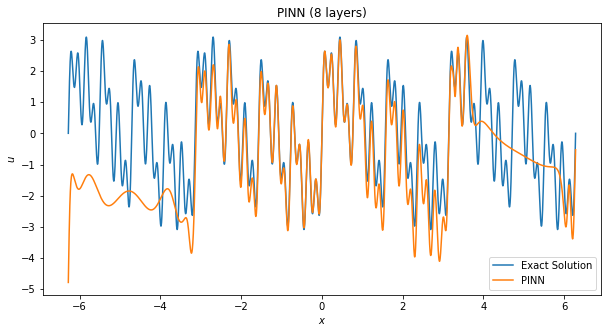

Loss: 0.5976172089576721


In [22]:
n_hidden_layers = [2, 3, 5, 8]

for nr_lay in n_hidden_layers:

    # Create the model      
    model = PINN_Cos_nD(domain, nr_lay, neurons, activation_function=nn.Tanh(), n_multi_scale = n_multi_scale, w_list=w_list)


    optimizer_ADAM = optim.Adam(model.parameters(),
                                lr=float(0.001))

    history, l1_loss_pinn = model.fit(num_points, optimizer_ADAM, n_epochs, verbose=True)

    l1_loss_pinn_arr.append(l1_loss_pinn)

    plot_solution_pinn(model, nr_lay)
    
    print("Loss: {}".format(np.min(l1_loss_pinn)))
    l1_loss_pinn_min.append(np.min(l1_loss_pinn))

    torch.save(model.state_dict(), 'models_save/scale_pinn_{}_{}.pdh'.format(len(w_list), nr_lay))

    with open("l1_loss_scale_pinn_{}_{}".format(len(w_list), nr_lay), 'wb') as file:
        pickle.dump(l1_loss_pinn, file)

### Multi-Case 3

In [23]:
w_list = [2, 4, 8]
n_multi_scale = len(w_list)

In [24]:
l1_loss_pinn_arr2 = []
l1_loss_pinn_min2 = []
loss_pinns_layers2 = []

Epoch :  0 	 Loss:  44.91310501098633 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  41.763092041015625 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  41.73424530029297 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  41.67941665649414 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  41.378211975097656 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  40.5807991027832 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  39.995460510253906 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  39.05947494506836 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  37.70927047729492 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  37.07714080810547 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  36.93450927734375 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  36.85624313354492 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  36.67374038696289 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  35.71198272705078 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  33.676700592041016 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  31.26436996459961 	 Epoch_time:  0  s
Epoch :  1600 	 Loss:  25.6702575

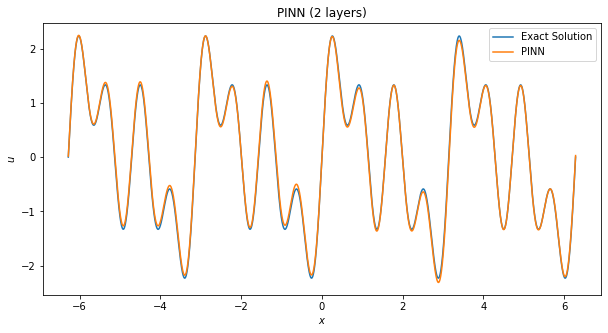

Loss: 0.011519457213580608
Epoch :  0 	 Loss:  56.20109558105469 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  41.25069808959961 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  40.603172302246094 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  40.06705856323242 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  39.554290771484375 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  38.55685806274414 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  37.10945129394531 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  36.69585037231445 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  36.38352584838867 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  35.991477966308594 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  32.71268844604492 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  28.7222843170166 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  26.091293334960938 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  25.278682708740234 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  19.85907745361328 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  17.663877487182617 	 Epoch_time:  0  s
Epoc

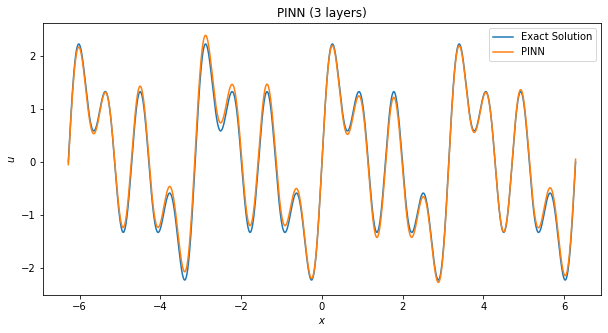

Loss: 0.0010799368610605597
Epoch :  0 	 Loss:  71.40780639648438 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  37.32353210449219 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  36.98109817504883 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  36.677589416503906 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  35.76337432861328 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  33.67010498046875 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  27.35883331298828 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  26.59859848022461 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  26.242250442504883 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  23.46259880065918 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  19.129289627075195 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  17.195545196533203 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  16.914318084716797 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  16.71307945251465 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  16.457378387451172 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  16.128740310668945 	 Epoch_time:  0  s
E

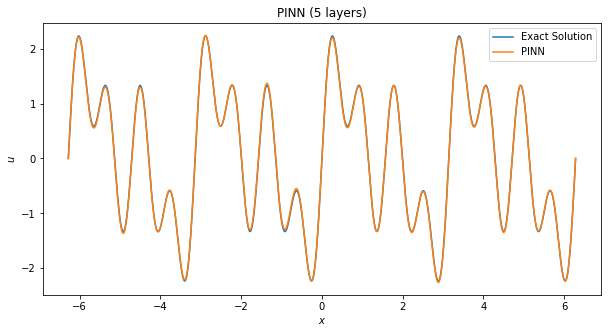

Loss: 0.001051857485435903
Epoch :  0 	 Loss:  72.19254302978516 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  36.77494430541992 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  33.096839904785156 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  28.924034118652344 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  26.66612434387207 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  26.32584571838379 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  21.956092834472656 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  20.867795944213867 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  16.299625396728516 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  16.149070739746094 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  15.855982780456543 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  15.422423362731934 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  15.187938690185547 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  13.381455421447754 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  11.361655235290527 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  10.911675453186035 	 Epoch_time:  0 

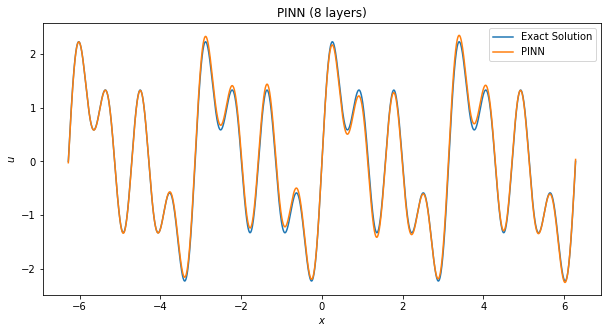

Loss: 0.0026093623600900173


In [25]:
n_hidden_layers = [2, 3, 5, 8]

for nr_lay in n_hidden_layers:

    # Create the model      
    model = PINN_Cos_nD(domain, nr_lay, neurons, activation_function=nn.Tanh(), n_multi_scale = n_multi_scale, w_list=w_list)


    optimizer_ADAM = optim.Adam(model.parameters(),
                                lr=float(0.001))

    history, l1_loss_pinn = model.fit(num_points, optimizer_ADAM, n_epochs, verbose=True)

    l1_loss_pinn_arr2.append(l1_loss_pinn)

    plot_solution_pinn(model, nr_lay)
    
    print("Loss: {}".format(np.min(l1_loss_pinn)))
    l1_loss_pinn_min2.append(np.min(l1_loss_pinn))

    torch.save(model.state_dict(), 'models_save/scale_pinn_{}_{}.pdh'.format(len(w_list), nr_lay))

    with open("l1_loss_scale_pinn_{}_{}".format(len(w_list), nr_lay), 'wb') as file:
        pickle.dump(l1_loss_pinn, file)

[0.011519457, 0.0010799369, 0.0010518575, 0.0026093624]


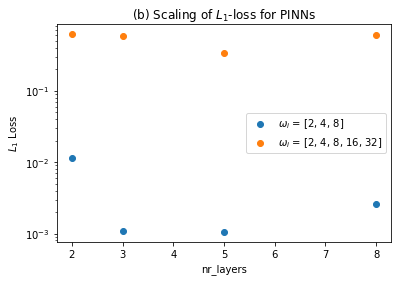

In [43]:
x = n_hidden_layers

fig = plt.figure(figsize= (6, 4))

plt.scatter(x, l1_loss_pinn_min2, alpha = 1, label = r'$\omega_i$ = [2, 4, 8]')
plt.scatter(x, l1_loss_pinn_min, alpha = 1, label = r'$\omega_i$ = [2, 4, 8, 16, 32]')
plt.legend()
plt.title(r'(b) Scaling of $L_1$-loss for PINNs')
plt.yscale('log')
plt.xlabel('nr_layers')
plt.ylabel(r"$L_1$ Loss")
plt.savefig("l1_loss_scatter_pinn.pdf")
plt.show()

### Time cost

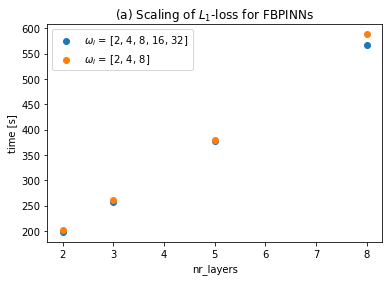

In [44]:
x = n_hidden_layers

# times_5 = [1213, 2205, 2725, 3639]
# times_3 = [945, 2810, 4667, 9293]

# [ 3  min  21  s, 4  min  22  s, 6  min  19  s, 9  min  48  s]
# [ 3  min  18  s ,4  min  17  s,6  min  17  s, 9  min  26  s]

times_3 = [201, 262, 379, 588]
times_5 = [198, 257, 377, 566]

fig = plt.figure(figsize= (6, 4))

# plt.scatter(x, l1_loss_min, alpha = 1, label = r's$\omega_i$ = [2, 4, 8]')
plt.scatter(x, times_5, alpha = 1, label = r'$\omega_i$ = [2, 4, 8, 16, 32]')
plt.scatter(x, times_3, alpha = 1, label = r'$\omega_i$ = [2, 4, 8]')
plt.legend()
plt.title(r'(a) Scaling of time for PINNs')
# plt.yscale('log')
plt.xlabel('nr_layers')
plt.ylabel(r"time [s]")
plt.savefig("time_scatter_pinn.pdf")
plt.show()